In [1]:
import xgboost as xgb, pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction import DictVectorizer
from sklearn_pandas import DataFrameMapper
from sklearn_pandas import CategoricalImputer
sns.set()

# ***Using XGBoost: a quick example***

In [ ]:
class_data = pd.read_csv("classification_data.csv")

X, y = class_data.iloc[:,:-1], class_data.iloc[:,-1]
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2, random_state=123)

xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)

xg_cl.fit(X_train, y_train)
preds = xg_cl.predict(X_test)
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

### ***XGBoost: Fit/Predict*** ข้อมูลใหญ่เกิน ต้องทำ clipboard หลายรอบ ขี้เกียจ

Here, you'll be working with churn data. This dataset contains data from a ride-sharing app with user behaviors over their first month of app usage in a set of cities as well as whether they used the service 5 months after sign-up. It has been pre-loaded for you into a DataFrame called `churn_data`.

Your goal is to use the first month's worth of data to predict whether the app's users will remain users of the service at the 5 month mark. This is a typical setup for a ***churn*** prediction problem. To do this, you'll split the data into training and test sets, fit a small **`xgboost`** model on the training set, and evaluate its performance on the test set by computing its accuracy.

**`pandas`** and **`numpy`** have been imported as **`pd`** and **`np`**, and **`train_test_split`** has been imported from **`sklearn.model_selection`**. Additionally, the arrays for the features and the target have been created as `X` and `y`.

Create training and test sets such that 20% of the data is used for testing. Use a random_state of `123`.

* Instantiate an XGBoostClassifier as `xg_cl` using **`xgb.XGBClassifier()`**. 
* Specify **`n_estimators`** to be `10` estimators and an objective of **`'binary:logistic'`**. Do not worry about what this means just yet, you will learn about these parameters later in this course.
* Fit `xg_cl` to the training set `(X_train, y_train)` using the **`.fit()`** method.
* Predict the labels of the test set `(X_test)` using the **`.predict()`** method and hit 'Submit Answer' to print the accuracy.
```
churn_data.head()

   avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_inc_price  inc_pct  weekday_pct  fancy_car_user  city_Carthag  city_Harko  phone_iPhone  first_month_cat_more_1_trip  \
0      3.67                   5.0                   4.7           1.10     15.4         46.2            True             0           1             1                            1   
1      8.26                   5.0                   5.0           1.00      0.0         50.0           False             1           0             0                            0   
2      0.77                   5.0                   4.3           1.00      0.0        100.0           False             1           0             1                            1   
3      2.36                   4.9                   4.6           1.14     20.0         80.0            True             0           1             1                            1   
4      3.13                   4.9                   4.4           1.19     11.8         82.4           False             0           0             0                            1   

   first_month_cat_no_trips  month_5_still_here  
0                         0                   1  
1                         1                   0  
2                         0                   0  
3                         0                   1  
4                         0                   0  
```

In [ ]:
import xgboost as xgb

# Create arrays for the features and the target: X, y
X, y = churn_data.iloc[:,:-1], churn_data.iloc[:,-1]

# Create the training and test sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)

# Fit the classifier to the training set
xg_cl.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_cl.predict(X_test)

# Compute the accuracy: accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

# ใช้ xg_cl.score(X_test, y_test) ก็ได้เหมือนกัน



```
<script.py> output:
    accuracy: 0.743300
```
Your model has an accuracy of around 74%



# ***Decision Trees***

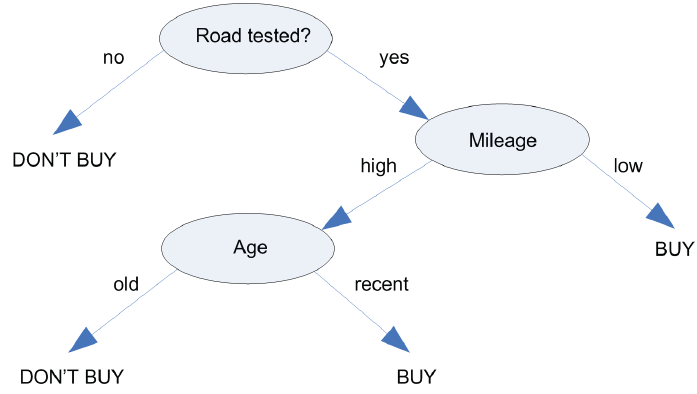

Your task is to make a simple decision tree using scikit-learn's **`DecisionTreeClassifier`** on the breast cancer dataset that comes pre-loaded with scikit-learn.

This dataset contains numeric measurements of various dimensions of individual tumors (such as perimeter and texture) from breast biopsies and a single outcome value (the tumor is either malignant, or benign).

We've preloaded the dataset of samples (measurements) into `X` and the target values per tumor into `y`. Now, you have to split the complete dataset into training and testing sets, and then train a **`DecisionTreeClassifier`**. You'll specify a parameter called **`max_depth`**. Many other parameters can be modified within this model, and you can check all of them out [here](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier).


* Create training and test sets such that 20% of the data is used for testing. Use a **`random_state`** of `123`.

* Instantiate a **`DecisionTreeClassifier`** called `dt_clf_4` with a **`max_depth`** of `4`. This parameter specifies the maximum number of successive split points you can have before reaching a leaf node.

* Fit the classifier to the training set and predict the labels of the test set.

In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

breast = load_breast_cancer()
X, y = breast.data, breast.target

# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the classifier: dt_clf_4
dt_clf_4 = DecisionTreeClassifier(max_depth=4)

# Fit the classifier to the training set
dt_clf_4.fit(X_train, y_train)

# Predict the labels of the test set: y_pred_4
y_pred_4 = dt_clf_4.predict(X_test)

# Compute the accuracy of the predictions: accuracy
accuracy = float(np.sum(y_pred_4==y_test))/y_test.shape[0]
print("accuracy:", accuracy)

accuracy: 0.9736842105263158


It's now time to learn about what gives **XGBoost** its state-of-the-art performance: **Boosting**.

## ***Cross-validation in XGBoost***

In [ ]:
churn_data = pd.read_csv("classification_data.csv")

churn_dmatrix = xgb.DMatrix(data=churn_data.iloc[:,:-1], label=churn_data.month_5_still_here)
params={"objective":"binary:logistic","max_depth":4}
cv_results = xgb.cv(dtrain=churn_dmatrix, 
                    params=params, 
                    nfold=4,
                    num_boost_round=10, 
                    metrics="error", 
                    as_pandas=True)
print("Accuracy: %f" %((1-cv_results["test-error-mean"]).iloc[-1]))

### ***Measuring accuracy***

You'll now practice using XGBoost's learning API through its baked in cross-validation capabilities. XGBoost gets its lauded performance and efficiency gains by utilizing its own optimized data structure for datasets called a **`DMatrix`**.

In the previous exercise, the input datasets were converted into DMatrix data on the fly, but when you use the **`xgboost`** **`cv`** object, you have to first explicitly convert your data into a **`DMatrix`**. So, that's what you will do here before running cross-validation on `churn_data`.

* Create a **`DMatrix`** called `churn_dmatrix` from `churn_data` using **`xgb.DMatrix()`**. The features are available in `X` and the labels in `y`.

* Perform 3-fold cross-validation by calling **`xgb.cv()`**. **`dtrain`** is your `churn_dmatrix`, **`params`** is your parameter dictionary, **`nfold`** is the number of cross-validation folds (`3`), **`num_boost_round`** is the number of trees we want to build (`5`), **`metrics`** is the metric you want to compute (this will be `"error"`, which we will convert to an accuracy).

In [ ]:
# Create arrays for the features and the target: X, y
X, y = churn_data.iloc[:,:-1], churn_data.iloc[:,-1]

# Create the DMatrix from X and y: churn_dmatrix
churn_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:logistic", "max_depth":3}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=churn_dmatrix, params=params, 
                  nfold=3, num_boost_round=5, 
                  metrics="error", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the accuracy
print(((1-cv_results["test-error-mean"]).iloc[-1]))



```
<script.py> output:
       train-error-mean  train-error-std  test-error-mean  test-error-std
    0           0.28232         0.002366          0.28378        0.001932
    1           0.26951         0.001855          0.27190        0.001932
    2           0.25605         0.003213          0.25798        0.003963
    3           0.25090         0.001845          0.25434        0.003827
    4           0.24654         0.001981          0.24852        0.000934
    0.75148
```

`cv_results` stores the training and test mean and standard deviation of the error per boosting round (tree built) as a DataFrame. From `cv_results`, the final round `'test-error-mean'` is extracted and converted into an accuracy, where accuracy is `1-error`. The final accuracy of around 75% is an improvement from earlier!

### ***Measuring AUC***

Now that you've used cross-validation to compute average out-of-sample accuracy (after converting from an error), it's very easy to compute any other metric you might be interested in. All you have to do is to pass it (or a list of metrics) in as an argument to the `metrics` parameter of `xgb.cv()`.

Your job in this exercise is to compute another common metric used in binary classification - the area under the curve (`"auc"`). As before, `churn_data` is available in your workspace, along with the DMatrix `churn_dmatrix` and parameter dictionary `params`.

* Perform `3`-fold cross-validation with `5` boosting rounds and `"auc"` as your metric.

* Print the `"test-auc-mean"` column of `cv_results`.


In [ ]:
# Perform cross_validation: cv_results
cv_results = xgb.cv(dtrain=churn_dmatrix, params=params, 
                  nfold=3, num_boost_round=5, 
                  metrics='auc', as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the AUC
print((cv_results['test-auc-mean']).iloc[-1])



```
<script.py> output:
       train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
    0        0.768893       0.001544       0.767863      0.002820
    1        0.790864       0.006758       0.789157      0.006846
    2        0.815872       0.003900       0.814476      0.005997
    3        0.822959       0.002018       0.821682      0.003912
    4        0.827528       0.000769       0.826191      0.001937
    
    0.826191
```



An AUC of `0.84` is quite strong. As you have seen, XGBoost's learning API makes it very easy to compute any metric you may be interested in. 

### ***When NOT to use XGBoost?***

There are some situations in which it is not the best option.

* Visualizing the similarity between stocks by comparing the time series of their historical prices relative to each other.
  * This is an example of a clustering problem - there are no labels to learn from here.
* Predicting whether a person will develop cancer using genetic data with millions of genes, 23 examples of genomes of people that didn't develop cancer, 3 genomes of people who wound up getting cancer.
  * This would not be an ideal use of XGBoost as there are many more features than there are examples.
* Clustering documents into topics based on the terms used in them.
  * This is an example of a clustering problem. There are no targets and so you cannot use supervised learning.

# ***Trees as base learners example: Scikit-learn API***

In [ ]:
import xgboost as xgb, pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

boston_data = pd.read_csv("boston_housing.csv")

X, y = boston_data.iloc[:,:-1],boston_data.iloc[:,-1]

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2,random_state=123)

xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=10, seed=123)

xg_reg.fit(X_train, y_train)
preds = xg_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE: %f" % (rmse))

```
RMSE: 129043.2314
```
# ***Linear base learners example: learning API only***


In [ ]:
import xgboost as xgb, pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

boston_data = pd.read_csv("boston_housing.csv")

X, y = boston_data.iloc[:,:-1],boston_data.iloc[:,-1]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)
DM_train = xgb.DMatrix(data=X_train,label=y_train)
DM_test = xgb.DMatrix(data=X_test,label=y_test)
params = {"booster":"gblinear","objective":"reg:squarederror"}

xg_reg = xgb.train(params = params, dtrain=DM_train, num_boost_round=10)
preds = xg_reg.predict(DM_test)

rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE: %f" % (rmse))



```
RMSE: 124326.24465
```



### ***Decision trees as base learners***

It's now time to build an XGBoost model to predict house prices in Ames, Iowa. This dataset of housing prices has been pre-loaded into a DataFrame called `df`. If you explore it in the Shell, you'll see that there are a variety of features about the house and its location in the city.

In this exercise, your goal is to use trees as base learners. By default, XGBoost uses trees as base learners, so you don't have to specify that you want to use trees here with **`booster="gbtree"`**.

**`xgboost`** has been imported as **`xgb`** and the arrays for the features and the target are available in `X` and `y`, respectively.

* Split `df` into training and testing sets, holding out 20% for testing. Use a **`random_state`** of `123`.

* Instantiate the **`XGBRegressor`** as `xg_reg`, using a **`seed`** of `123`. Specify an objective of `"reg:linear"` and use `10` trees. Note: You don't have to specify `booster="gbtree"` as this is the default.

* Fit `xg_reg` to the training data and predict the labels of the test set. Save the predictions in a variable called `preds`.

* Compute the `rmse` using `np.sqrt()` and the `mean_squared_error()` function `from sklearn.metrics`, which has been pre-imported.

In [7]:
df = pd.read_csv('ames_housing_trimmed_processed.csv')
X, y = df.drop(columns='SalePrice'), df['SalePrice']

# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=10, seed=123)

# Fit the regressor to the training set
xg_reg.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

# Compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 78847.401758


Next, you'll train an XGBoost model using linear base learners and XGBoost's learning API. Will it perform better or worse?

### ***Linear base learners***

Now that you've used trees as base models in XGBoost, let's use the other kind of base model that can be used with XGBoost - a linear learner. This model, although not as commonly used in XGBoost, allows you to create a regularized linear regression using XGBoost's powerful learning API. ***However, because it's uncommon, you have to use XGBoost's own non-scikit-learn compatible functions to build the model, such as `xgb.train()`***.

In order to do this you must create the parameter dictionary that describes the kind of booster you want to use (similarly to how you created the dictionary when you used `xgb.cv()`). The key-value pair that defines the booster type (base model) you need is `"booster":"gblinear"`.

Once you've created the model, you can use the `.train()` and `.predict()` methods of the model just like you've done in the past.

Here, the data has already been split into training and testing sets, so you can dive right into creating the `DMatrix` objects required by the XGBoost learning API.

* Create two DMatrix objects - `DM_train` for the training set (`X_train` and `y_train`), and `DM_test` (`X_test` and `y_test`) for the test set.

* Create a parameter dictionary that defines the `"booster"` type you will use (`"gblinear"`) as well as the `"objective"` you will minimize (`"reg:linear"`).

* Train the model using **`xgb.train()`**. You have to specify arguments for the following parameters: `params`, `dtrain`, and `num_boost_round`. Use `5` boosting rounds.

* Predict the labels on the test set using **`xg_reg.predict()`**, passing it `DM_test`. Assign to `preds`.


In [8]:
# Convert the training and testing sets into DMatrixes: DM_train, DM_test
DM_train = xgb.DMatrix(data=X_train,label=y_train)
DM_test =  xgb.DMatrix(data=X_test,label=y_test)

# Create the parameter dictionary: params
params = {"booster":"gblinear", "objective":"reg:squarederror"}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=DM_train, num_boost_round=5)

# Predict the labels of the test set: preds
preds = xg_reg.predict(DM_test)

# Compute and print the RMSE
rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE: %f" % (rmse))  

RMSE: 44331.645061


It looks like linear base learners performed better!

# ***Evaluating model quality***

It's now time to begin evaluating model quality.

Here, you will compare the RMSE and MAE of a cross-validated XGBoost model on the Ames housing data. As in previous exercises, all necessary modules have been pre-loaded and the data is available in the DataFrame `df`.

* Perform 4-fold cross-validation with 5 boosting rounds and `"rmse"` as the metric.
* Extract and print the final boosting round RMSE.

In [10]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, metrics='rmse', as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final boosting round metric
print((cv_results['test-rmse-mean']).tail(1))

   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0    141767.488281      429.449371   142980.464844    1193.806011
1    102832.562500      322.503447   104891.398438    1223.161012
2     75872.621094      266.493573    79478.947265    1601.341377
3     57245.657226      273.633063    62411.919922    2220.151162
4     44401.291992      316.426590    51348.276367    2963.378029
4    51348.276367
Name: test-rmse-mean, dtype: float64


* Now, adapt your code to compute the `"mae"` instead of the `"rmse"`.

In [12]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, metrics='mae', as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final boosting round metric
print((cv_results["test-mae-mean"]).tail(1))

   train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0   127343.595703     668.167771  127634.185547   2404.009753
1    89770.031250     456.980559   90122.505860   2107.916842
2    63580.782226     263.442189   64278.558594   1887.552548
3    45633.181640     151.849960   46819.175781   1459.821980
4    33587.097656      87.003217   35670.655274   1140.613227
4    35670.655274
Name: test-mae-mean, dtype: float64


# ***L1 regularization in XGBoost***

In [13]:
import xgboost as xgb, pandas as pd

df = pd.read_csv('ames_housing_trimmed_processed.csv')
X, y = df.drop(columns='SalePrice'), df['SalePrice']

ames_dmatrix = xgb.DMatrix(data=X,label=y)
params={"objective":"reg:squarederror","max_depth":4}
l1_params = [1,10,100]
rmses_l1=[]

for reg in l1_params:
    params["alpha"] = reg
    cv_results = xgb.cv(dtrain=ames_dmatrix, 
                        params=params,
                        nfold=4, 
                        num_boost_round=10,
                        metrics="rmse",
                        as_pandas=True,
                        seed=123)
    rmses_l1.append(cv_results["test-rmse-mean"].tail(1).values[0])

print("Best rmse as a function of l1:")
print(pd.DataFrame(list(zip(l1_params,rmses_l1)), columns=["l1","rmse"]))

Best rmse as a function of l1:
    l1          rmse
0    1  35572.512695
1   10  35571.970703
2  100  35572.369140


### ***Using regularization in XGBoost***

You'll now vary the l2 regularization penalty - also known as "lambda" - and see its effect on overall model performance on the Ames housing dataset.

* Create your DMatrix from `X` and `y` as before.

* Create an initial parameter dictionary specifying an `"objective"` of `"reg:linear"` and `"max_depth"` of `3`.

* Use `xgb.cv()` inside of a for loop and systematically vary the `"lambda"` value by passing in the current l2 value (`reg`).

* Append the `"test-rmse-mean"` from the last boosting round for each cross-validated `xgboost` model.

In [14]:
df = pd.read_csv('ames_housing_trimmed_processed.csv')
X, y = df.drop(columns='SalePrice'), df['SalePrice']

# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

reg_params = [1, 10, 100]

# Create the initial parameter dictionary for varying l2 strength: params
params = {'objective':'reg:squarederror', 'max_depth':3}

# Create an empty list for storing rmses as a function of l2 complexity
rmses_l2 = []

# Iterate over reg_params
for reg in reg_params:

    # Update l2 strength
    params["lambda"] = reg
    
    # Pass this updated param dictionary into cv
    cv_results_rmse = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2, num_boost_round=5, metrics="rmse", as_pandas=True, seed=123)
    
    # Append best rmse (final round) to rmses_l2
    rmses_l2.append(cv_results_rmse["test-rmse-mean"].tail(1).values[0])

# Look at best rmse per l2 param
print("Best rmse as a function of l2:")
print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns=["l2", "rmse"]))

Best rmse as a function of l2:
    l2          rmse
0    1  52275.355469
1   10  57746.060547
2  100  76624.617188


It looks like as as the value of 'lambda' increases, so does the RMSE.

### ***Visualizing individual XGBoost trees***

Now that you've used XGBoost to both build and evaluate regression as well as classification models, you should get a handle on how to visually explore your models. Here, you will visualize individual trees from the fully boosted model that XGBoost creates using the entire housing dataset.

XGBoost has a **`plot_tree()`** function that makes this type of visualization easy. Once you train a model using the XGBoost learning API, you can pass it to the **`plot_tree()`** function along with the number of trees you want to plot using the `num_trees` argument.

* Create a parameter dictionary with an `"objective"` of `"reg:linear"` and a `"max_depth"` of `2`.

* Train the model using `10` boosting rounds and the parameter dictionary you created. Save the result in `xg_reg`.

* Plot the first tree using `xgb.plot_tree()`. It takes in two arguments - 
  * the model (in this case, `xg_reg`), and 
  * `num_trees`, which is 0-indexed. So to plot the first tree, specify `num_trees=0`.

* Plot the fifth tree.
* Plot the last (tenth) tree sideways. To do this, specify the additional keyword argument `rankdir="LR"`.

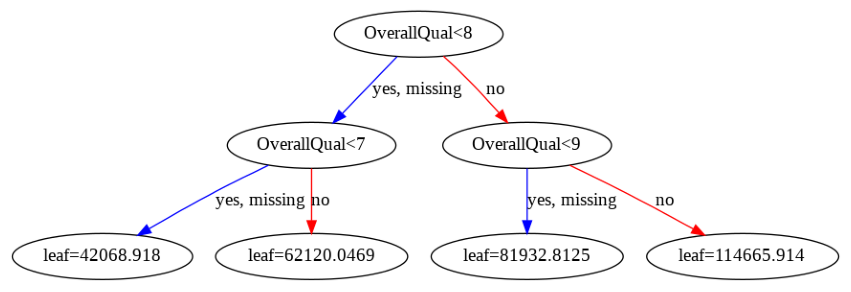

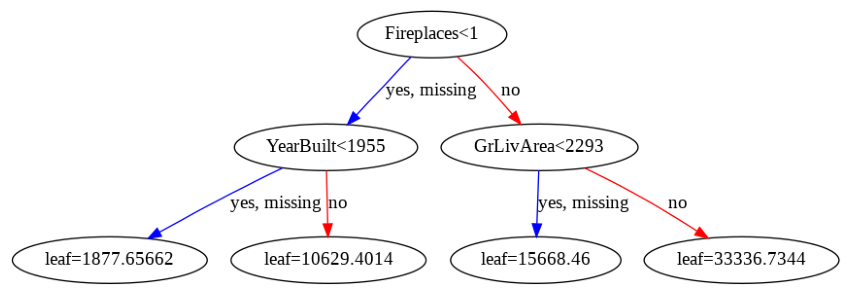

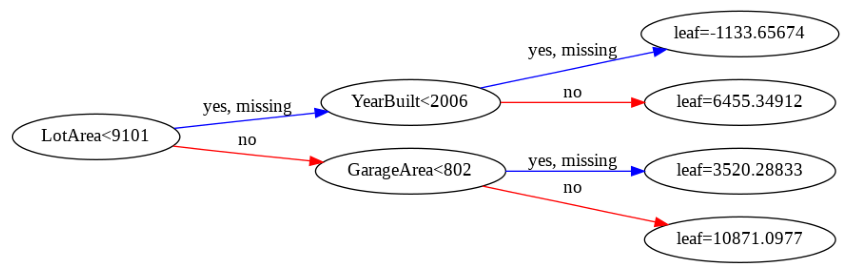

In [20]:
df = pd.read_csv('ames_housing_trimmed_processed.csv')
X, y = df.drop(columns='SalePrice'), df['SalePrice']
fig, ax = plt.subplots(figsize=(15, 10))
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":2}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the first tree
xgb.plot_tree(xg_reg, num_trees=0, ax=ax)
plt.show()
print("\n")

# Plot the fifth tree
fig, ax = plt.subplots(figsize=(15, 10))
xgb.plot_tree(xg_reg, num_trees=4, ax=ax)
plt.show()
print("\n")

# Plot the last tree sideways
fig, ax = plt.subplots(figsize=(15, 10))
xgb.plot_tree(xg_reg, num_trees=9, rankdir="LR", ax=ax)
plt.show()

Have a look at each of the plots. They provide insight into how the model arrived at its final decisions and what splits it made to arrive at those decisions. This allows us to identify which features are the most important in determining house price. In the next exercise, you'll learn another way of visualizing feature importances.

### ***Visualizing feature importances: What features are most important in my dataset***

Another way to visualize your XGBoost models is to examine the importance of each feature column in the original dataset within the model.

One simple way of doing this involves 

* ***counting the number of times each feature is split on across all boosting rounds (trees) in the model***, and then 
* ***visualizing the result as a bar graph***, with the features ordered according to how many times they appear. 

XGBoost has a **`plot_importance()`** function that allows you to do exactly this, and you'll get a chance to use it in this exercise!

* Create your **`DMatrix`** from `X` and `y` as before.

* Create a parameter dictionary with appropriate `"objective"` (`"reg:linear"`) and a `"max_depth"` of `4`.

* Train the model with `10` boosting rounds, exactly as you did in the previous exercise.

* Use **`xgb.plot_importance()`** and pass in the trained model to generate the graph of feature importances.

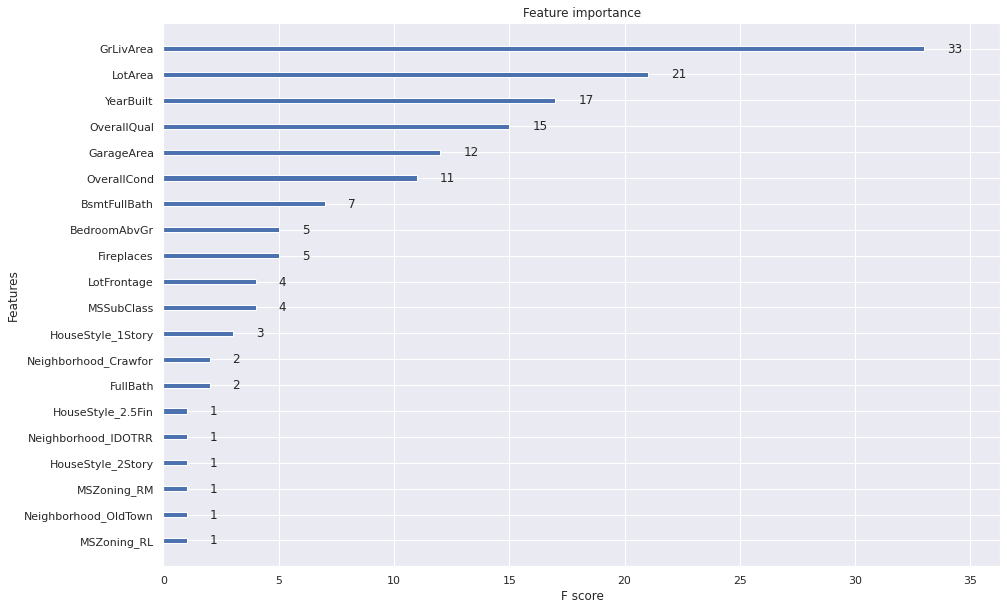

In [22]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {'objective': 'reg:squarederror', 'max_depth': 4}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the feature importances
fig, ax = plt.subplots(figsize=(15, 10))
xgb.plot_importance(xg_reg, ax=ax)
plt.show()

It looks like `GrLivArea` is the most important feature.

# ***Untuned model example***

In [23]:
import pandas as pd, xgboost as xgb, numpy as np

housing_data = pd.read_csv("ames_housing_trimmed_processed.csv")
X,y = housing_data[housing_data.columns.tolist()[:-1]], housing_data[housing_data.columns.tolist()[-1]]

housing_dmatrix = xgb.DMatrix(data=X,label=y)
untuned_params={"objective":"reg:squarederror"}
untuned_cv_results_rmse = xgb.cv(dtrain=housing_dmatrix, params=untuned_params,nfold=4, metrics="rmse",as_pandas=True,seed=123)
print("Untuned rmse: %f" %((untuned_cv_results_rmse["test-rmse-mean"]).tail(1)))

Untuned rmse: 34624.230957


# ***Tuned model example***

In [25]:
housing_data = pd.read_csv("ames_housing_trimmed_processed.csv")

X,y = housing_data[housing_data.columns.tolist()[:-1]], housing_data[housing_data.columns.tolist()[-1]]
housing_dmatrix = xgb.DMatrix(data=X,label=y)
tuned_params = {"objective":"reg:squarederror",'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 5}

tuned_cv_results_rmse = xgb.cv(dtrain=housing_dmatrix, params=tuned_params, nfold=4, num_boost_round=200, metrics="rmse", as_pandas=True, seed=123)
print("Tuned rmse: %f" %((tuned_cv_results_rmse["test-rmse-mean"]).tail(1)))

Tuned rmse: 31111.040039


### ***Tuning the number of boosting rounds***

Let's start with parameter tuning by seeing how the number of boosting rounds (number of trees you build) impacts the out-of-sample performance of your XGBoost model. You'll use **`xgb.cv()`** inside a `for` loop and build one model per **`num_boost_round`** parameter.

Here, you'll continue working with the Ames housing dataset. The features are available in the array `X`, and the target vector is contained in `y`.


* Create a `DMatrix` called `housing_dmatrix` from `X` and `y`.

* Create a parameter dictionary called `params`, passing in the appropriate `"objective"` (`"reg:linear"`) and `"max_depth"` (set it to `3`).

* Iterate over `num_rounds` inside a `for` loop and perform `3`-fold cross-validation. In each iteration of the loop, pass in the current number of boosting rounds (`curr_num_rounds`) to **`xgb.cv()`** as the argument to `num_boost_round`.

* Append the final boosting round RMSE for each cross-validated XGBoost model to the `final_rmse_per_round` list.

* `num_rounds` and `final_rmse_per_round` have been zipped and converted into a DataFrame so you can easily see how the model performs with each boosting round. 

In [27]:
df = pd.read_csv("ames_housing_trimmed_processed.csv")
X, y = df.drop(columns='SalePrice'), df['SalePrice']

# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary for each tree: params 
params = {'objective':'reg:squarederror', 'max_depth': 3}

# Create list of number of boosting rounds
num_rounds = [5, 10, 15]

# Empty list to store final round rmse per XGBoost model
final_rmse_per_round = []

# Iterate over num_rounds and build one model per num_boost_round parameter
for curr_num_rounds in num_rounds:

    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=3, num_boost_round=curr_num_rounds, metrics="rmse", as_pandas=True, seed=123)
    
    # Append final round RMSE
    final_rmse_per_round.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
num_rounds_rmses = list(zip(num_rounds, final_rmse_per_round))
print(pd.DataFrame(num_rounds_rmses,columns=["num_boosting_rounds","rmse"]))

   num_boosting_rounds          rmse
0                    5  50903.299479
1                   10  34774.191406
2                   15  32895.098307


As you can see, increasing the number of boosting rounds decreases the RMSE.

### ***Automated boosting round selection using early_stopping***

Now, instead of attempting to cherry pick the best possible number of boosting rounds, you can very easily have XGBoost automatically select the number of boosting rounds for you within **`xgb.cv()`**. This is done using a technique called early stopping.

Early stopping works by testing the XGBoost model after every boosting round against a hold-out dataset and stopping the creation of additional boosting rounds (thereby finishing training of the model early) if the hold-out metric ("rmse" in our case) does not improve for a given number of rounds. Here you will use the `early_stopping_rounds` parameter in **`xgb.cv()`** with a large possible number of boosting rounds (`50`). Bear in mind that if the holdout metric continuously improves up through when `num_boost_rounds` is reached, then early stopping does not occur.

Here, the `DMatrix` and parameter dictionary have been created for you. Your task is to use cross-validation with early stopping. Go for it!

* Perform `3`-fold cross-validation with early stopping and `"rmse"` as your metric. Use `10` early stopping rounds and `50` boosting rounds. Specify a `seed` of `123` and make sure the output is a `pandas` DataFrame. Remember to specify the other parameters such as `dtrain`, `params`, and `metrics`.
* Print `cv_results`.

In [29]:
# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary for each tree: params
params = {"objective":"reg:squarederror", "max_depth":4}

# Perform cross-validation with early stopping: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=3, num_boost_round=50, early_stopping_rounds=10, metrics="rmse", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

    train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0     141871.630208      403.632409   142640.630208     705.552907
1     103057.033854       73.787612   104907.677083     111.124997
2      75975.958333      253.705643    79262.057292     563.761707
3      57420.515625      521.666323    61620.138021    1087.681933
4      44552.960938      544.168971    50437.558594    1846.450522
5      35763.942708      681.796885    43035.660156    2034.476339
6      29861.469401      769.567549    38600.881511    2169.803563
7      25994.679036      756.524834    36071.816407    2109.801581
8      23306.832031      759.237670    34383.183594    1934.542189
9      21459.772786      745.623841    33509.141927    1887.374589
10     20148.728516      749.612756    32916.806641    1850.890045
11     19215.382162      641.387202    32197.834635    1734.459068
12     18627.391276      716.256399    31770.848958    1802.156167
13     17960.697265      557.046469    31482.781901    1779.12

### ***Tuning eta***

It's time to practice tuning other XGBoost hyperparameters in earnest and observing their effect on model performance! You'll begin by tuning the `"eta"`, also known as the **learning rate**.

The learning rate in XGBoost is a parameter that can range between 0 and 1, with higher values of `"eta"` penalizing feature weights more strongly, causing much stronger regularization.


* Create a list called `eta_vals` to store the following `"eta"` values: `0.001, 0.01,` and `0.1`. Iterate over your `eta_vals` list using a `for` loop.

* In each iteration of the `for` loop, set the `"eta"` key of params to be equal to `curr_val`. Then, perform 3-fold cross-validation with early stopping (`5` rounds), `10` boosting rounds, a metric of `"rmse"`, and a seed of `123`. Ensure the output is a DataFrame.
* Append the final round RMSE to the `best_rmse` list.

In [3]:
df = pd.read_csv("ames_housing_trimmed_processed.csv")
X, y = df.drop(columns='SalePrice'), df['SalePrice']

# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary for each tree (boosting round)
params = {"objective":"reg:squarederror", "max_depth":3}

# Create list of eta values and empty list to store final round rmse per xgboost model
eta_vals = [0.001, 0.01,  0.1]
best_rmse = []

# Systematically vary the eta 
for curr_val in eta_vals:

    params["eta"] = curr_val
    
    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=housing_dmatrix, 
                        params=params, 
                        nfold=3, 
                        num_boost_round=10, 
                        early_stopping_rounds=5, 
                        metrics="rmse", 
                        as_pandas=True, 
                        seed=123)
    best_rmse.append(cv_results['test-rmse-mean'].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(eta_vals, best_rmse)), columns=["eta","best_rmse"]))

     eta      best_rmse
0  0.001  195736.416667
1  0.010  179932.161458
2  0.100   79759.416667


### ***Tuning max_depth***

In this exercise, your job is to tune `max_depth`, which is the parameter that dictates the maximum depth that each tree in a boosting round can grow to. Smaller values will lead to shallower trees, and larger values to deeper trees.


* Create a list called `max_depths` to store the following `"max_depth"` values: `2, 5, 10, 20`. Iterate over your `max_depths` list using a `for` loop.
* Systematically vary `"max_depth"` in each iteration of the `for` loop and perform `2`-fold cross-validation with early stopping (`5` rounds), `10` boosting rounds, a metric of `"rmse"`, and a `seed` of `123`. Ensure the output is a DataFrame.

In [4]:
df = pd.read_csv("ames_housing_trimmed_processed.csv")
X, y = df.drop(columns='SalePrice'), df['SalePrice']

# Create your housing DMatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary
params = {"objective":"reg:squarederror"}

# Create list of max_depth values
max_depths = [2, 5, 10, 20]
best_rmse = []

# Systematically vary the max_depth
for curr_val in max_depths:

    params["max_depth"] = curr_val
    
    # Perform cross-validation
    cv_results = xgb.cv(dtrain=housing_dmatrix, 
                        params=params, 
                        nfold=2, 
                        num_boost_round=10, 
                        early_stopping_rounds=5, 
                        metrics="rmse", 
                        as_pandas=True, 
                        seed=123)
    
    
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(max_depths, best_rmse)),columns=["max_depth","best_rmse"]))

   max_depth     best_rmse
0          2  37957.472657
1          5  35596.595703
2         10  36065.548829
3         20  36739.576172


### ***Tuning colsample_bytree***

Now, it's time to tune `"colsample_bytree"`. You've already seen this if you've ever worked with `scikit-learn`'s **`RandomForestClassifier`** or **`RandomForestRegressor`**, where it just was called **`max_features`**. In both `xgboost` and `sklearn`, this parameter (although named differently) simply specifies the fraction of features to choose from at every split in a given tree. In `xgboost`, `colsample_bytree` must be specified as a `float` between `0` and `1`.

* Create a list called `colsample_bytree_vals` to store the values `0.1, 0.5, 0.8, 1`.
* Systematically vary `"colsample_bytree"` and perform cross-validation, exactly as you did with `max_depth` and `eta` previously.

In [6]:
df = pd.read_csv("ames_housing_trimmed_processed.csv")
X, y = df.drop(columns='SalePrice'), df['SalePrice']

# Create your housing DMatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary
params={"objective":"reg:squarederror","max_depth":3}

# Create list of hyperparameter values: colsample_bytree_vals
colsample_bytree_vals = [0.1, 0.5, 0.8, 1]
best_rmse = []

# Systematically vary the hyperparameter value 
for curr_val in colsample_bytree_vals:

    params['colsample_bytree'] = curr_val
    
    # Perform cross-validation
    cv_results = xgb.cv(dtrain=housing_dmatrix, 
                        params=params, 
                        nfold=2, 
                        num_boost_round=10, 
                        early_stopping_rounds=5, 
                        metrics="rmse", 
                        as_pandas=True, 
                        seed=123)
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(colsample_bytree_vals, best_rmse)), columns=["colsample_bytree","best_rmse"]))

   colsample_bytree     best_rmse
0               0.1  48193.453125
1               0.5  36013.542969
2               0.8  35932.960938
3               1.0  35836.044922


There are several other individual parameters that you can tune, such as **`"subsample"`**, which dictates the fraction of the training data that is used during any given boosting round. Next up: Grid Search and Random Search to tune XGBoost hyperparameters more efficiently!

# ***Grid search: example***

In [6]:
import pandas as pd, xgboost as xgb, numpy as np
from sklearn.model_selection import GridSearchCV

housing_data = pd.read_csv("ames_housing_trimmed_processed.csv")
X, y = housing_data[housing_data.columns.tolist()[:-1]], housing_data[housing_data.columns.tolist()[-1]]
housing_dmatrix = xgb.DMatrix(data=X,label=y)
gbm_param_grid = {'learning_rate': [0.01,0.1,0.5,0.9],
                  'n_estimators': [200],
                  'subsample': [0.3, 0.5, 0.9]}

gbm = xgb.XGBRegressor(objective='reg:squarederror')
grid_mse = GridSearchCV(estimator=gbm, 
                        param_grid=gbm_param_grid,
                        scoring='neg_mean_squared_error', 
                        cv=4, 
                        verbose=1)

grid_mse.fit(X, y)
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Fitting 4 folds for each of 12 candidates, totalling 48 fits
Best parameters found:  {'learning_rate': 0.1, 'n_estimators': 200, 'subsample': 0.5}
Lowest RMSE found:  28410.039476552454


# ***Random search: example***

In [7]:
import pandas as pd, xgboost as xgb, numpy as np
from sklearn.model_selection import RandomizedSearchCV

housing_data = pd.read_csv("ames_housing_trimmed_processed.csv")
X, y = housing_data[housing_data.columns.tolist()[:-1]], housing_data[housing_data.columns.tolist()[-1]]
housing_dmatrix = xgb.DMatrix(data=X, label=y)
gbm_param_grid = {'learning_rate': np.arange(0.05,1.05,.05),
                  'n_estimators': [200],
                  'subsample': np.arange(0.05,1.05,.05)} # จะเห็นว่ามีจำนวนพารามิเตอร์เยอะมากๆ

gbm = xgb.XGBRegressor(objective='reg:squarederror')

randomized_mse = RandomizedSearchCV(estimator=gbm, 
                                    param_distributions=gbm_param_grid,
                                    n_iter=25, 
                                    scoring='neg_mean_squared_error', 
                                    cv=4, 
                                    verbose=1)

randomized_mse.fit(X, y)
print("Best parameters found: ", randomized_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_mse.best_score_)))

Fitting 4 folds for each of 25 candidates, totalling 100 fits
Best parameters found:  {'subsample': 0.55, 'n_estimators': 200, 'learning_rate': 0.1}
Lowest RMSE found:  28447.36441323331


### ***Grid search with XGBoost***

Now that you've learned how to tune parameters individually with XGBoost, let's take your parameter tuning to the next level by using scikit-learn's **`GridSearch`** and **`RandomizedSearch`** capabilities with internal cross-validation using the **`GridSearchCV`** and **`RandomizedSearchCV`** functions. You will use these to find the best model exhaustively from a collection of possible parameter values across multiple parameters simultaneously. Let's get to work, starting with **`GridSearchCV`**!


* Create a parameter grid called `gbm_param_grid` that contains a list of `"colsample_bytree"` values `(0.3, 0.7)`, a list with a single value for `"n_estimators" (50)`, and a list of `2 "max_depth" (2, 5)` values.

* Instantiate an **`XGBRegressor`** object called `gbm`.
* Create a **`GridSearchCV`** object called `grid_mse`, passing in: the parameter grid to `param_grid`, the **XGBRegressor`** to `estimator`, `"neg_mean_squared_error"` to scoring, and `4` to `cv`. Also specify `verbose=1` so you can better understand the output.

* Fit the **`GridSearchCV`** object to `X` and `y`.
* Print the best parameter values and lowest RMSE, using the **`.best_params_`** and **`.best_score_`** attributes, respectively, of `grid_mse`.

In [10]:
df = pd.read_csv("ames_housing_trimmed_processed.csv")
X, y = df.drop(columns='SalePrice'), df['SalePrice']

# Create the parameter grid: gbm_param_grid
gbm_param_grid = {
    'colsample_bytree': [0.3, 0.7],
    'n_estimators': [50],
    'max_depth': [2, 5]
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor(objective='reg:squarederror')

# Perform grid search: grid_mse
grid_mse = GridSearchCV(estimator=gbm, 
                        param_grid=gbm_param_grid, 
                        scoring='neg_mean_squared_error', 
                        cv=4, 
                        verbose=1)

# Fit grid_mse to the data
grid_mse.fit(X, y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Fitting 4 folds for each of 4 candidates, totalling 16 fits
Best parameters found:  {'colsample_bytree': 0.7, 'max_depth': 5, 'n_estimators': 50}
Lowest RMSE found:  29916.562522854438


### ***Random search with XGBoost***

Often, **`GridSearchCV`** can be really time consuming, so in practice, you may want to use **`RandomizedSearchCV`** instead, as you will do in this exercise. The good news is you only have to make a few modifications to your **`GridSearchCV`** code to do **`RandomizedSearchCV`**. The key difference is you have to specify a **`param_distributions`** parameter instead of a **`param_grid`** parameter.

* Create a parameter grid called `gbm_param_grid` that contains a list with a single value for `'n_estimators'` (`25`), and a list of `'max_depth'` values between `2` and `11` for `'max_depth'` - use `range(2, 12)` for this.

* Create a **`RandomizedSearchCV`** object called `randomized_mse`, passing in: the parameter grid to `param_distributions`, the XGBRegressor to `estimator`, `"neg_mean_squared_error"` to `scoring`, `5` to `n_iter`, and `4` to `cv`. Also specify `verbose=1` so you can better understand the output.

* Fit the **`RandomizedSearchCV`** object to `X` and `y`.

In [11]:
df = pd.read_csv("ames_housing_trimmed_processed.csv")
X, y = df.drop(columns='SalePrice'), df['SalePrice']

# Create the parameter grid: gbm_param_grid 
gbm_param_grid = {
    'n_estimators': [25],
    'max_depth': range(2, 12)
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor(n_estimators=10, objective='reg:squarederror')

# Perform random search: grid_mse
randomized_mse = RandomizedSearchCV(estimator=gbm, param_distributions=gbm_param_grid, n_iter=5, scoring='neg_mean_squared_error', cv=4, verbose=1)


# Fit randomized_mse to the data
randomized_mse.fit(X, y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", randomized_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_mse.best_score_)))

Fitting 4 folds for each of 5 candidates, totalling 20 fits
Best parameters found:  {'n_estimators': 25, 'max_depth': 5}
Lowest RMSE found:  36636.35808132903


# ***Scikit-learn pipeline example***

In [ ]:
import pandas as pd, numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

names = ["crime","zone","industry","charles","no","rooms", "age", "distance","radial","tax","pupil","aam","lower","med_price"]

data = pd.read_csv("boston_housing.csv",names=names)
X, y = data.iloc[:,:-1], data.iloc[:,-1]

rf_pipeline = Pipeline[("st_scaler", StandardScaler()),
                       ("rf_model", RandomForestRegressor())]

scores = cross_val_score(rf_pipeline, X, y, scoring="neg_mean_squared_error", cv=10)
final_avg_rmse = np.mean(np.sqrt(np.abs(scores)))

print("Final RMSE:", final_avg_rmse)



```
Final RMSE: 4.54530686529
```

### ***Exploratory data analysis***

Before diving into the nitty gritty of pipelines and preprocessing, let's do some exploratory analysis of the original, unprocessed [Ames housing dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). When you worked with this data above, we preprocessed it for you so you could focus on the core XGBoost concepts. In this chapter, you'll do the preprocessing yourself!

A smaller version of this original, unprocessed dataset has been pre-loaded into a pandas DataFrame called `df`. The purpose of this exercise is to understand the kinds of transformations you will need to perform in order to be able to use XGBoost.

The `LotFrontage` column actually does have missing values: `259`, to be precise. Additionally, notice how columns such as `MSZoning`, `PavedDrive`, and `HouseStyle` are categorical. These need to be encoded numerically before you can use XGBoost. 



In [16]:
df = pd.read_csv('ames_unprocessed_data.csv')

print(df[['LotFrontage', 'MSZoning', 'PavedDrive', 'HouseStyle']].info())
display(df[['LotFrontage', 'MSZoning', 'PavedDrive', 'HouseStyle']].head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1201 non-null   float64
 1   MSZoning     1460 non-null   object 
 2   PavedDrive   1460 non-null   object 
 3   HouseStyle   1460 non-null   object 
dtypes: float64(1), object(3)
memory usage: 45.8+ KB
None


,LotFrontage,MSZoning,PavedDrive,HouseStyle
0,65.0,RL,Y,2Story
1,80.0,RL,Y,1Story
2,68.0,RL,Y,2Story
3,60.0,RL,Y,2Story
4,84.0,RL,Y,2Story
5,85.0,RL,Y,1.5Fin
6,75.0,RL,Y,1Story
7,NaN,RL,Y,2Story
8,51.0,RM,Y,1.5Fin
9,50.0,RL,Y,1.5Unf


### ***Encoding categorical columns I: LabelEncoder***

Now that you've seen what will need to be done to get the housing data ready for XGBoost, let's go through the process step-by-step.

First, you will need to fill in missing values - as you saw previously, the column `LotFrontage` has many missing values. Then, you will need to encode any categorical columns in the dataset using one-hot encoding so that they are encoded numerically. You can watch [this video](https://campus.datacamp.com/courses/supervised-learning-with-scikit-learn/preprocessing-and-pipelines?ex=1https://) for a refresher on the idea.

The data has five categorical columns: `MSZoning, PavedDrive, Neighborhood, BldgType`, and `HouseStyle`. Scikit-learn has a **`LabelEncoder`** function that converts the values in each categorical column into integers. You'll practice using this here.


* Import **`LabelEncoder`** `from sklearn.preprocessing`.

* Fill in missing values in the `LotFrontage` column with `0` using **`.fillna()`**.
* Create a boolean mask for categorical columns. You can do this by checking for whether `df.dtypes` equals object.

* Create a **`LabelEncoder`** object. You can do this in the same way you instantiate any scikit-learn estimator.

* Encode all of the categorical columns into integers using **`LabelEncoder()`**. To do this, use the **`.fit_transform()`** method of `le` in the provided lambda function.

In [2]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('ames_unprocessed_data.csv')

# Fill missing values with 0
df.LotFrontage = df.LotFrontage.fillna(0)

# Create a boolean mask for categorical columns
categorical_mask = (df.dtypes=='object')

# Get list of categorical column names
categorical_columns = df.columns[categorical_mask].tolist()

# Print the head of the categorical columns
display(df[categorical_columns].head())

# Create LabelEncoder object: le
le = LabelEncoder()

# Apply LabelEncoder to categorical columns
df[categorical_columns] = df[categorical_columns].apply(lambda x: le.fit_transform(x))

# Print the head of the LabelEncoded categorical columns
display(df[categorical_columns].head())

,MSZoning,Neighborhood,BldgType,HouseStyle,PavedDrive
0,RL,CollgCr,1Fam,2Story,Y
1,RL,Veenker,1Fam,1Story,Y
2,RL,CollgCr,1Fam,2Story,Y
3,RL,Crawfor,1Fam,2Story,Y
4,RL,NoRidge,1Fam,2Story,Y


,MSZoning,Neighborhood,BldgType,HouseStyle,PavedDrive
0,3,5,0,5,2
1,3,24,0,2,2
2,3,5,0,5,2
3,3,6,0,5,2
4,3,15,0,5,2


Notice how the entries in each categorical column are now encoded numerically. A `BldgTpe` of `1Fam` is encoded as `0`, while a `HouseStyle` of `2Story` is encoded as `5`.

### ***Encoding categorical columns II: OneHotEncoder*** (df ถูกเปลี่ยนจากขั้นตอนข้างบนแล้ว)

Okay - so you have your categorical columns encoded numerically. Can you now move onto using pipelines and XGBoost? Not yet! In the categorical columns of this dataset, there is no natural ordering between the entries. As an example: Using **`LabelEncoder`**, the `CollgCr` Neighborhood was encoded as `5`, while the `Veenker` Neighborhood was encoded as `24`, and `Crawfor` as `6`. Is Veenker "greater" than Crawfor and CollgCr? No - and allowing the model to assume this natural ordering may result in poor performance.

As a result, there is another step needed: You have to apply a one-hot encoding to create binary, or "dummy" variables. You can do this using scikit-learn's **`OneHotEncoder`**.


* Instantiate a **`OneHotEncoder`** object called `ohe`. Specify the keyword arguments **`categorical_features=categorical_mask`** and **`sparse=False`**.

* Using its **`.fit_transform()`** method, apply the **`OneHotEncoder`** to `df` and save the result as `df_encoded`. The output will be a `NumPy` array.

* Print the first 5 rows of `df_encoded`, and then the shape of `df` as well as `df_encoded` to compare the difference.

In [8]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.8 MB 58.0 MB/s 


In [2]:
!pip install scikit-learn=='0.21.2'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.7 MB 4.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.21.2 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.21.2 which is incompatible.


In [5]:
from sklearn.preprocessing import OneHotEncoder

# Create OneHotEncoder: ohe
ohe = OneHotEncoder(categorical_features=categorical_mask, sparse=False)

# Apply OneHotEncoder to categorical columns - output is no longer a dataframe: df_encoded
df_encoded = ohe.fit_transform(df)

# Print first 5 rows of the resulting dataset - again, this will no longer be a pandas dataframe
print(df_encoded[:5, :])

# Print the shape of the original DataFrame
print(df.shape)

# Print the shape of the transformed array
print(df_encoded.shape)

[[0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 1.000e+00 6.000e+01 6.500e+01 8.450e+03
  7.000e+00 5.000e+00 2.003e+03 0.000e+00 1.710e+03 1.000e+00 0.000e+00
  2.000e+00 1.000e+00 3.000e+00 0.000e+00 5.480e+02 2.085e+05]
 [0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 1.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:395: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  check_array(X, dtype=np.int)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".


### ***Encoding categorical columns III: DictVectorizer***

Alright, one final trick before you dive into pipelines. The two step process you just went through - **`LabelEncoder`** followed by **`OneHotEncoder`** - can be simplified by using a [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html).

Using a **`DictVectorizer`** on a DataFrame that has been converted to a dictionary allows you to get label encoding as well as one-hot encoding in one go.

Your task is to work through this strategy in this exercise!

* Convert `df` into a dictionary called `df_dict` using its **`.to_dict()`** method with `"records"` as the argument.

* Instantiate a **`DictVectorizer`** object called `dv` with the keyword argument **`sparse=False`**.

* Apply the **`DictVectorizer` on `df_dict` by using its **`.fit_transform()`** method.


In [3]:
from sklearn.feature_extraction import DictVectorizer

# Convert df into a dictionary: df_dict
df_dict = df.to_dict('records')

# Create the DictVectorizer object: dv
dv = DictVectorizer(sparse=False)

# Apply dv on df: df_encoded
df_encoded = dv.fit_transform(df_dict)

# Print the resulting first five rows
print(df_encoded[:5,:])

# Print the vocabulary
print(dv.vocabulary_)

[[3.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 2.000e+00 5.480e+02
  1.710e+03 1.000e+00 5.000e+00 8.450e+03 6.500e+01 6.000e+01 3.000e+00
  5.000e+00 5.000e+00 7.000e+00 2.000e+00 0.000e+00 2.085e+05 2.003e+03]
 [3.000e+00 0.000e+00 0.000e+00 1.000e+00 1.000e+00 2.000e+00 4.600e+02
  1.262e+03 0.000e+00 2.000e+00 9.600e+03 8.000e+01 2.000e+01 3.000e+00
  2.400e+01 8.000e+00 6.000e+00 2.000e+00 0.000e+00 1.815e+05 1.976e+03]
 [3.000e+00 0.000e+00 1.000e+00 0.000e+00 1.000e+00 2.000e+00 6.080e+02
  1.786e+03 1.000e+00 5.000e+00 1.125e+04 6.800e+01 6.000e+01 3.000e+00
  5.000e+00 5.000e+00 7.000e+00 2.000e+00 1.000e+00 2.235e+05 2.001e+03]
 [3.000e+00 0.000e+00 1.000e+00 0.000e+00 1.000e+00 1.000e+00 6.420e+02
  1.717e+03 0.000e+00 5.000e+00 9.550e+03 6.000e+01 7.000e+01 3.000e+00
  6.000e+00 5.000e+00 7.000e+00 2.000e+00 1.000e+00 1.400e+05 1.915e+03]
 [4.000e+00 0.000e+00 1.000e+00 0.000e+00 1.000e+00 2.000e+00 8.360e+02
  2.198e+03 1.000e+00 5.000e+00 1.426e+04 8.400e+01 6.000e+0

Besides simplifying the process into one step, **`DictVectorizer`** has useful attributes such as **`.vocabulary_`** which maps the names of the features to their indices. With the data preprocessed, it's time to move onto pipelines!

### ***Preprocessing within a pipeline***

Now that you've seen what steps need to be taken individually to properly process the Ames housing data, let's use the much cleaner and more succinct **`DictVectorizer`** approach and put it alongside an **`XGBoostRegressor`** inside of a scikit-learn pipeline.

* Fill in any missing values in the `LotFrontage` column of `X` with `0`.

* Complete the steps of the pipeline with **`DictVectorizer(sparse=False)`** for `"ohe_onestep"` and **`xgb.XGBRegressor()`** for `"xgb_model"`.

* Create the pipeline using **`Pipeline()`** and steps.

* Fit the `Pipeline`. Don't forget to convert `X` into a format that **`DictVectorizer`** understands by calling the **`.to_dict("records")`** method on `X`.

In [9]:
df = pd.read_csv('ames_unprocessed_data.csv')
X, y = df.drop(columns='SalePrice'), df['SalePrice']

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction import DictVectorizer

# Fill LotFrontage missing values with 0
X.LotFrontage = X.LotFrontage.fillna(0)

# Setup the pipeline steps: steps
steps = [("ohe_onestep", DictVectorizer(sparse=False)),
         ("xgb_model", xgb.XGBRegressor(objective='reg:squarederror'))]

# Create the pipeline: xgb_pipeline
xgb_pipeline = Pipeline(steps)

# Fit the pipeline
xgb_pipeline.fit(X.to_dict('records'), y)

Pipeline(steps=[('ohe_onestep', DictVectorizer(sparse=False)),
                ('xgb_model', XGBRegressor(objective='reg:squarederror'))])

### ***Scikit-learn pipeline example with XGBoost***



In [ ]:
import pandas as pd, xgboost as xgb, numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

names = ["crime","zone","industry","charles","no","rooms","age","distance","radial","tax","pupil","aam","lower","med_price"]
data = pd.read_csv("boston_housing.csv",names=names)
X, y = data.iloc[:,:-1], data.iloc[:,-1]

xgb_pipeline = Pipeline[("st_scaler", StandardScaler()),
                        ("xgb_model",xgb.XGBRegressor())]

scores = cross_val_score(xgb_pipeline, X, y, scoring="neg_mean_squared_error",cv=10)
final_avg_rmse = np.mean(np.sqrt(np.abs(scores)))
print("Final XGB RMSE:", final_avg_rmse)



```
Final RMSE: 4.02719593323
```
### ***Cross-validating your XGBoost model***

In this exercise, you'll go one step further by using the pipeline you've created to preprocess and cross-validate your model.

* Create a pipeline called `xgb_pipeline` using `steps`.

* Perform `10`-fold cross-validation using **`cross_val_score()`**. You'll have to pass in 
  * the pipeline, 
  * `X` (as a dictionary, using **`.to_dict("records")`**), 
  * `y`, 
  * the number of folds you want to use, and 
  * scoring (`"neg_mean_squared_error"`).

* Print the `10`-fold RMSE.


In [12]:
df = pd.read_csv('ames_unprocessed_data.csv')
X, y = df.drop(columns='SalePrice'), df['SalePrice']

# Import necessary modules
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Fill LotFrontage missing values with 0
X['LotFrontage'] = X['LotFrontage'].fillna(0)

# Setup the pipeline steps: steps
steps = [("ohe_onestep", DictVectorizer(sparse=False)),
         ("xgb_model", xgb.XGBRegressor(max_depth=2, objective="reg:squarederror"))]

# Create the pipeline: xgb_pipeline
xgb_pipeline = Pipeline(steps)

# Cross-validate the model
cross_val_scores = cross_val_score(xgb_pipeline, X.to_dict('records'), y, scoring="neg_mean_squared_error",cv=10)

# Print the 10-fold RMSE
print("10-fold RMSE: ", np.mean(np.sqrt(np.abs(cross_val_scores))))

10-fold RMSE:  29867.603720688923


### ***Kidney disease case study I: Categorical Imputer***

You'll now continue your exploration of using pipelines with a dataset that requires significantly more wrangling. The chronic kidney disease dataset contains both categorical and numeric features, but contains lots of missing values. The goal here is to predict who has chronic kidney disease given various blood indicators as features.

You'll be introduced to a new library, **`sklearn_pandas`**, that allows you to chain many more processing steps inside of a pipeline than are currently supported in scikit-learn. Specifically, you'll be able to impute missing categorical values directly using the 
* **`Categorical_Imputer()`** class in **`sklearn_pandas`**, and the 
* **`DataFrameMapper()`** class to apply any arbitrary sklearn-compatible transformer on DataFrame columns, where the resulting output can be either a NumPy array or DataFrame.

We've also created a transformer called a `Dictifier` that encapsulates converting a DataFrame using **`.to_dict("records")`** without you having to do it explicitly (and so that it works in a pipeline). Finally, we've also provided the list of feature names in `kidney_feature_names`, the target name in `kidney_target_name`, the features in `X`, and the target in `y`.

In this exercise, your task is to apply the **`CategoricalImputer`** to impute all of the categorical columns in the dataset. You can refer to how the numeric imputation mapper was created as a template. Notice the keyword arguments **`input_df=True`* and **`df_out=True`**. This is so that you can work with DataFrames instead of arrays. By default, the transformers are passed a numpy array of the selected columns as input, and as a result, the output of the DataFrame mapper is also an array. Scikit-learn transformers have historically been designed to work with numpy arrays, not pandas DataFrames, even though their basic indexing interfaces are similar.

* Apply the categorical imputer using **`DataFrameMapper()`** and **`CategoricalImputer()`**. **`CategoricalImputer()`** does not need any arguments to be passed in. The columns are contained in `categorical_columns`. Be sure to specify **`input_df=True`** and **`df_out=True`**, and use `category_feature` as your iterator variable in the list comprehension.

In [2]:
from sklearn_pandas import DataFrameMapper
from sklearn_pandas import CategoricalImputer
from sklearn.impute import SimpleImputer

kidney_data = pd.read_csv('kidney_data.csv').drop(columns='Unnamed: 0')
X, y = kidney_data.drop(columns='class'), kidney_data['class']


# Check number of nulls in each feature column
nulls_per_column = X.isnull().sum()
print(nulls_per_column)

# Create a boolean mask for categorical columns
categorical_feature_mask = X.dtypes == object

# Get list of categorical column names
categorical_columns = X.columns[categorical_feature_mask].tolist()

# Get list of non-categorical column names
non_categorical_columns = X.columns[~categorical_feature_mask].tolist()

# Apply numeric imputer
numeric_imputation_mapper = DataFrameMapper(
                                            [([numeric_feature], SimpleImputer(strategy="median")) for numeric_feature in non_categorical_columns],
                                            input_df=True,
                                            df_out=True
                                           )

# Apply categorical imputer
categorical_imputation_mapper = DataFrameMapper(
                                                [(category_feature, CategoricalImputer()) for category_feature in categorical_columns],
                                                input_df=True,
                                                df_out=True
                                               )

age        9
bp        12
sg        47
al        46
su        49
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wc       106
rc       131
rbc      152
pc        65
pcc        4
ba         4
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64


### ***Kidney disease case study II: Feature Union***

Having separately imputed numeric as well as categorical columns, your task is now to use scikit-learn's **`FeatureUnion`** to concatenate their results, which are contained in two separate transformer objects - `numeric_imputation_mapper`, and `categorical_imputation_mapper`, respectively.

You may have already encountered **`FeatureUnion`** in [Machine Learning with the Experts: School Budgets](https://campus.datacamp.com/courses/machine-learning-with-the-experts-school-budgets/improving-your-model?ex=7). Just like with pipelines, you have to pass it a list of `(string, transformer)` tuples, where the first half of each tuple is the name of the transformer.

* Combine the results of `numeric_imputation_mapper` and `categorical_imputation_mapper` using **`FeatureUnion()`**, with the names `"num_mapper"` and `"cat_mapper"` respectively.

In [3]:
# Import FeatureUnion
from sklearn.pipeline import FeatureUnion

# Combine the numeric and categorical transformations
numeric_categorical_union = FeatureUnion([
                                          ('num_mapper', numeric_imputation_mapper),
                                          ('cat_mapper', categorical_imputation_mapper)
                                         ])

### ***Kidney disease case study III: Full pipeline***

It's time to piece together all of the transforms along with an **`XGBClassifier`** to build the full pipeline!

Besides the `numeric_categorical_union` that you created in the previous exercise, there are two other transforms needed: the **`Dictifier()`** transform which we created for you, and the **`DictVectorizer()`**.

## ***ไอ้ Class `Dictifier()` เนี่ย มันต้องไปแงะ methods มาทีละอัน โดยดูจาก help และใช้ `getsource` เช่น `getsource(Dictifier.fit)`*** 

After creating the pipeline, your task is to cross-validate it to see how well it performs.


* Create the pipeline using the `numeric_categorical_union`, **`Dictifier()`**, and **`DictVectorizer(sort=False)`** transforms, and **`xgb.XGBClassifier()`** estimator with **`max_depth=3`**. Name the transforms `"featureunion"`, `"dictifier"` `"vectorizer"`, and the estimator `"clf"`.

* Perform 3-fold cross-validation on the pipeline using **`cross_val_score()`**. Pass it the pipeline, `pipeline`, the features, `kidney_data`, the outcomes, `y`. Also set scoring to `"roc_auc"` and `cv` to `3`.

In [4]:
import sklearn

class Dictifier(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin):
    
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if type(X) == pd.core.frame.DataFrame:
            return X.to_dict("records")
        else:
            return pd.DataFrame(X).to_dict("records")

    def fit_transform(self, X, y=None, **fit_params):
        """Fit to data, then transform it.

        Fits transformer to X and y with optional parameters fit_params
        and returns a transformed version of X.

        Parameters
        ----------
        X : numpy array of shape [n_samples, n_features]
            Training set.

        y : numpy array of shape [n_samples]
            Target values.

        Returns
        -------
        X_new : numpy array of shape [n_samples, n_features_new]
            Transformed array.

        """
        # non-optimized default implementation; override when a better
        # method is possible for a given clustering algorithm
        if y is None:
            # fit method of arity 1 (unsupervised transformation)
            return self.fit(X, **fit_params).transform(X)
        else:
            # fit method of arity 2 (supervised transformation)
            return self.fit(X, y, **fit_params).transform(X)

# Create full pipeline
pipeline = Pipeline([
                     ("featureunion", numeric_categorical_union),
                     ("dictifier", Dictifier()),
                     ("vectorizer", DictVectorizer(sort=False)),
                     ("clf", xgb.XGBClassifier(max_depth=3))
                    ])

# Perform cross-validation
cross_val_scores = cross_val_score(pipeline, kidney_data, y, scoring='roc_auc', cv=3)

# Print avg. AUC
print("3-fold AUC: ", np.mean(cross_val_scores))

3-fold AUC:  0.998637406769937


### ***Bringing it all together***

Combine your work from the previous exercises into one end-to-end XGBoost pipeline to really cement your understanding of preprocessing and pipelines in XGBoost.

Your work from the previous 3 exercises, where you preprocessed the data and set up your pipeline, has been pre-loaded. Your job is to perform a randomized search and identify the best hyperparameters.

* Set up the parameter grid to tune 
  * `'clf__learning_rate'` (from `0.05` to `1` in increments of `0.05`),
  * `'clf__max_depth'` (from `3` to `10` in increments of `1`), and 
  * `'clf__n_estimators'` (from `50` to `200` in increments of `50`).

* Using your pipeline as the estimator, perform `2`-fold **`RandomizedSearchCV`** with an **`n_iter`** of `2`. Use **`"roc_auc"`** as the metric, and set **`verbose`** to `1` so the output is more detailed. Store the result in `randomized_roc_auc`.

* Fit `randomized_roc_auc` to `X` and `y`.

* Compute the best score and best estimator of `randomized_roc_auc`.

In [6]:
# Create the parameter grid
gbm_param_grid = {'clf__learning_rate': np.arange(0.05, 1, 0.05), 
                  'clf__max_depth': np.arange(3, 10, 1),
                  'clf__n_estimators': np.arange(50, 200, 50)}

# Perform RandomizedSearchCV
randomized_roc_auc = RandomizedSearchCV(estimator=pipeline, 
                                        param_distributions=gbm_param_grid, 
                                        n_iter=2, 
                                        scoring='roc_auc', 
                                        cv=2, 
                                        verbose=1)

# Fit the estimator
randomized_roc_auc.fit(X, y)

# Compute metrics
print(randomized_roc_auc.best_score_)
print(f'randomized_roc_auc.best_estimator_ = {randomized_roc_auc.best_estimator_}')

Fitting 2 folds for each of 2 candidates, totalling 4 fits
0.9961599999999999
randomized_roc_auc.best_estimator_ = Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('num_mapper',
                                                 DataFrameMapper(df_out=True,
                                                                 features=[(['age'],
                                                                            SimpleImputer(strategy='median')),
                                                                           (['bp'],
                                                                            SimpleImputer(strategy='median')),
                                                                           (['sg'],
                                                                            SimpleImputer(strategy='median')),
                                                                           (['al'],
                                         

This type of pipelining is very common in real-world data science and you're well on your way towards mastering it.